Merton model

In [5]:
import scipy.stats as si
from sympy import init_printing
init_printing()



def bs_call(v, D, T, r, sigma):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / D) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = (v * si.norm.cdf(d1, 0.0, 1.0) - D * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))

    return call

In [24]:

def merton_equity(v, d, sigma, r, t,T):
    """
    v - Value of firm
    d - ZCB value
    sigma - volatility
    r - riskfree interest rate
    T - Last period
    t - current period
    """
    period = T-t

    d1 = (np.log(v / d) + (0.5 * sigma ** 2) * period + r * period) / (sigma * np.sqrt(period))
    d2 = d1 - sigma * np.sqrt(period)

    equity = (v * si.norm.cdf(d1, 0.0, 1.0) - d * np.exp(-r * period) * si.norm.cdf(d2, 0.0, 1.0))

    return equity
print(f' Senior Equity value = {merton_equity(100, 50 , 0.25, 0.010, 0 , 1):.2f}')
print(f' Senior Debt value = {100-merton_equity(100, 50, 0.25, 0.010, 0, 1):.2f}')

print(f' Junior Equity value = {merton_equity(100, 100 , 0.250, 0.010, 0 , 1):.2f}')
print(f' Junior Debt value = {merton_equity(100, 50 , 0.250, 0.010, 0 , 1)-merton_equity(100, 100, 0.25, 0.010, 0, 1):.2f}')

 Senior Equity value = 50.51
 Senior Debt value = 49.49
 Junior Equity value = 10.40
 Junior Debt value = 40.11


In [15]:
def merton_debt(v, d, sigma, r, t, T):
    debt = v - merton_equity(v, d, sigma, r, t, T)

    return debt

print(merton_debt(100, 50, 0.20, 0.10, 0, 5))


30.298158655463766


Making a DataFrame to illustrate the value debt and equity as a fuction of the firm's asset value

c:\users\johan\onedrive - university of copenhagen\8. semester\kreditrisiko\python\venv\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


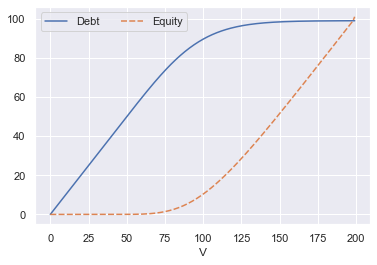

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.linspace(0, 200, 200,  dtype=int), columns=['V'] )

param = {
            "v": 180,
            "Ds": 50,
            "Dj": 50,
            "r": 0.01,
            "sigma": 0.25,
            "T": 1
        }

df['B'] = merton_debt(df['V'], 100, 0.25, 0.01, 0, 1)

df['S'] = merton_equity(df['V'], 100, 0.25, 0.01, 0, 1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.lineplot(data=[df['B'],df['S']])
plt.legend(['Debt','Equity'], ncol=2, loc='upper left')
plt.xlabel('V')
# plt.ylabel('')
plt.show()

Fuctions for junior and senior debt

In [3]:

def Senior_debt(v, ds, T, r, sigma):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / ds) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    Senior_debt = v - (v * si.norm.cdf(d1, 0.0, 1.0) - ds * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))

    return Senior_debt


def Junior_debt(v, ds, dj, T, r, sigma):
    # S     : value of firm
    # ds    : senior debt
    # dj    : junior debt
    # T     : time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / (ds+dj)) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    d1_senior = (np.log(v / ds) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2_senior = d1_senior - sigma * np.sqrt(T)

    Junior_debt = (v * si.norm.cdf(d1_senior, 0.0, 1.0) - ds * np.exp(-r * T) * si.norm.cdf(d2_senior, 0.0, 1.0)) \
                  - (v * si.norm.cdf(d1, 0.0, 1.0) - (ds+dj) * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))


    return Junior_debt


def sub_equity(v, ds, dj, T, r, sigma):
    # S     : value of firm
    # ds    : senior debt
    # dj    : junior debt
    # T     : time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / (ds+dj)) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    sub_equity = (v * si.norm.cdf(d1, 0.0, 1.0) - (ds+dj) * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    return sub_equity


In [1]:
def sen_debt(V, Ds, Dj, r, T, sigma):
    import scipy.stats as si
    import numpy as np
    PV = Ds*np.exp(-r*T)
    d1 = (np.log(V/Ds)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    n1 = si.norm.cdf(d1, 0, 1)
    n2 = si.norm.cdf(d2, 0, 1)

    sen_deb = V * n1 - PV*n2

    sub_PV = (Ds+Dj)*np.exp(-r*T)
    sub_d1 = (np.log(V/(Ds+Dj))+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    sub_d2 = sub_d1-sigma*np.sqrt(T)
    sub_n1 = si.norm.cdf(sub_d1, 0, 1)
    sub_n2 = si.norm.cdf(sub_d2, 0, 1)

    sub_deb = sen_deb - (V * sub_n1 - sub_PV*sub_n2)

    return sen_deb

def sub_debt(V, Ds, Dj, r, T, sigma):
    import scipy.stats as si
    import numpy as np
    PV = Ds*np.exp(-r*T)
    d1 = (np.log(V/Ds)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    n1 = si.norm.cdf(d1, 0, 1)
    n2 = si.norm.cdf(d2, 0, 1)

    sen_deb = V * n1 - PV*n2

    sub_PV = (Ds+Dj)*np.exp(-r*T)
    sub_d1 = (np.log(V/(Ds+Dj))+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    sub_d2 = sub_d1-sigma*np.sqrt(T)
    sub_n1 = si.norm.cdf(sub_d1, 0, 1)
    sub_n2 = si.norm.cdf(sub_d2, 0, 1)

    sub_deb = sen_deb - (V * sub_n1 - sub_PV*sub_n2)

    return sub_deb

# print(sen_debt(100, 50, 50, 0.01, 1, 0.25))
# print(sub_debt(100, 50, 50, 0.01, 1, 0.25))

Merton Credit Spread

In [2]:
import pandas as pd
import numpy as np
df_90 = pd.DataFrame(data=np.linspace(1, 30, 30,  dtype=int), columns=['T'] )
df_90['Senior Face value'] = 50
df_90['Junior Face value'] = 100
df_90['Senior Debt'] = round(sen_debt(90, 50, 50, 0.01, df_90['T'], 0.25),2 )
df_90['Junior Debt'] = round(sub_debt(90, 50, 50, 0.01, df_90['T'], 0.25),2 )


df_180 = pd.DataFrame(data=np.linspace(1, 30, 30,  dtype=int), columns=['T'] )
df_180['Senior Face value'] = 50
df_180['Junior Face value'] = 100
df_180['Senior Debt'] = round(sen_debt(180, 50, 50, 0.01, df_180['T'], 0.25),2 )
df_180['Junior Debt'] = round(sub_debt(180, 50, 50, 0.01, df_180['T'], 0.25),2 )

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

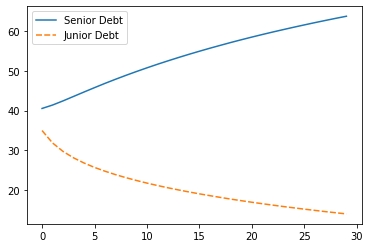

<Figure size 432x288 with 0 Axes>

In [4]:
sns.lineplot(data=[df_90['Senior Debt'], df_90['Junior Debt']])
plt.show()
plt.clf()

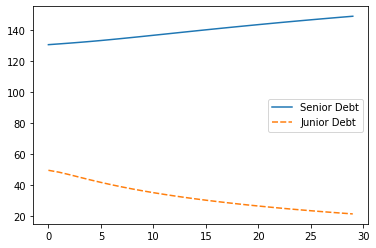

In [5]:
sns.lineplot(data=[df_180['Senior Debt'], df_180['Junior Debt']])
plt.show()

In [21]:
def CreditSpread(D, F, r, t, T):
    import numpy as np
    tau = T-t
    CS = (1/tau)*np.log(D/F)-r

    return CS

print(CreditSpread(df_180.iloc[1,3], 50, 0.01, 2, len(df_180['T'])))


# print(len(df_180['T']))

0.023081042114986274


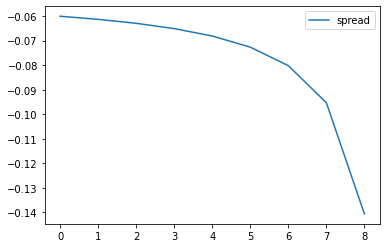

In [8]:
import pandas as pd
import numpy as np

def credit_spread(V, F, r, t, T, sigma):
    import scipy.stats as si
    import numpy as np
    PV = F*np.exp(-r*T)
    d1 = (np.log(V/F)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    n1 = si.norm.cdf(d1, 0, 1)
    n2 = si.norm.cdf(d2, 0, 1)

    debt = V * n1 - PV*n2

    tau = T-t

    spread = (1/tau)*np.log(debt/F)-r

    return spread



df_150 = pd.DataFrame(data=np.linspace(1, 10, 10,  dtype=int), columns=['T'] )

df_150['spread'] = credit_spread(150, 100, 0.05, df_150['T'], len( df_150['T']), 0.20)
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=[df_150['spread']])
plt.show()
